In [141]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IndianWeatherRepository.csv')
data.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
NewData = data.select_dtypes(exclude=['object'])

In [144]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79948 entries, 0 to 79947
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      79948 non-null  float64
 1   longitude                     79948 non-null  float64
 2   last_updated_epoch            79948 non-null  int64  
 3   temperature_celsius           79948 non-null  float64
 4   temperature_fahrenheit        79948 non-null  float64
 5   wind_mph                      79948 non-null  float64
 6   wind_kph                      79948 non-null  float64
 7   wind_degree                   79948 non-null  int64  
 8   pressure_mb                   79948 non-null  float64
 9   pressure_in                   79948 non-null  float64
 10  precip_mm                     79948 non-null  float64
 11  precip_in                     79948 non-null  float64
 12  humidity                      79948 non-null  int64  
 13  c

In [145]:
#X = NewData[["latitude", "longitude",'air_quality_Ozone', "last_updated_epoch", "temperature_celsius", "temperature_fahrenheit", "wind_mph", "wind_kph", "wind_degree", "pressure_mb", "pressure_in", "precip_mm", "precip_in", "humidity", "cloud", "feels_like_celsius", "feels_like_fahrenheit", "visibility_km", "visibility_miles", "uv_index", "gust_mph", "gust_kph",  "air_quality_Nitrogen_dioxide", "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10", "air_quality_us-epa-index", "air_quality_gb-defra-index", "moon_illumination", 'uv_index']]
#Y = NewData["air_quality_Carbon_Monoxide"]

Y = NewData['temperature_celsius']
X = NewData[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

X = np.array(X)
Y = np.array(Y)

Y = Y.reshape(-1,1)
print(X.shape, Y.shape)

(79948, 8) (79948, 1)


In [146]:
print(Y)

[[27.5]
 [27.5]
 [26.3]
 ...
 [21. ]
 [28. ]
 [21.8]]


In [147]:
#Rellenar nulos, normalizar
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy = 'mean')
#X = imputer.fit_transform(X)

X_norm = normalize(X)
print(X_norm)

[[0.02334971 0.07385997 0.01948185 ... 0.         0.06367238 0.02470869]
 [0.02213856 0.07382682 0.01470843 ... 0.         0.06642516 0.01802969]
 [0.02073305 0.07414859 0.01728537 ... 0.         0.06575955 0.04791053]
 ...
 [0.01256779 0.07710773 0.00349915 ... 0.         0.08067492 0.00194397]
 [0.00846568 0.07295395 0.00575704 ... 0.         0.06983948 0.04718884]
 [0.02142378 0.07243835 0.00595919 ... 0.         0.02344599 0.        ]]


In [148]:
#Agregar bias
X1 = np.column_stack((np.ones((len(X_norm),1)), X_norm))
print(X1.shape)

(79948, 9)


In [149]:
#Dividir data set en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 0)

[[0.17510205 0.16377792 0.78582788 0.25332482 0.16008477 0.57735301
  0.39173894 0.939038   0.87089837]]
W: [[9.61676692 0.34093295 1.51136013 0.33529652 1.69933571 9.7732271
  0.39181802 1.64649191 1.2377927 ]]


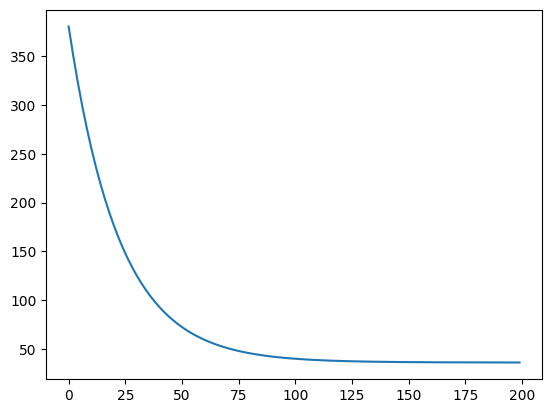

In [150]:
#6. Primer algoritmo de Regresion lineal usando GD
import matplotlib.pyplot as plt


#Initialize W
m, n = np.shape(X_train)
initw = np.random.rand(1, n)
print(initw)


#Gradient function
def gradient(X, Y, W):
    residual = Y - np.dot(X, W.T) #Salida menos predicción
    grad = -2 * np.dot(X.T, residual)
    return grad


#Cost function
def mse(Y, Yt):
    m = len(Y)
    residual = Y - Yt
    cost = (1/m) * np.dot(residual.T, residual)
    return cost


#GD Algorithm
def GD(X, Y, W, alpha, iterations):
    grad = gradient(X,Y,W)
    it = 0
    J = []
    while it < iterations:
        grad = gradient(X, Y, W)
        W = W - np.dot(alpha, grad.T)
        it += 1
        Yt = np.dot(X, W.T)
        costo = mse(Y, Yt)
        J.append(costo)
    return W, it, J


#Testing the GD
w, iterations, J = GD(X_train, y_train, initw,0.0000001, 200)
J = np.array(J)
J = J.reshape(-1,1)
print('W:',w)
plt.plot(J)

In [151]:
#7. Implementar R2 como medición de desempeño
from sklearn.metrics import r2_score

y_hat_train = np.dot(X_train, w.T)
y_hat_test = np.dot(X_test, w.T)

R2_train = []
R2_test = []

r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

R2_train. append (r2_train)
R2_test. append(r2_test)

print(R2_train, R2_test)

[0.006215428462353567] [0.007256631931191748]


In [152]:
#8. Segundo algoritmo de Regresion Lineal usando Librerias

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
costTr = reg.score(X_train, y_train)
costTe = reg.score(X_test, y_test)

print('R2_training:', costTr)
print('R2_test:', costTe)

R2_training: 0.2852559196110802
R2_test: 0.2859972313411543


In [153]:
#9. Guardar socores en mi lista
R2_train.append(costTr)
R2_test.append(costTe)

print(R2_train, R2_test)

[0.006215428462353567, 0.2852559196110802] [0.007256631931191748, 0.2859972313411543]


In [154]:
#10. Tercer algoritmo usando Decision Trees para Regresion
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor()
DT_reg = dtreg.fit(X_train, y_train)

In [155]:
#11. Obtener R2 del DT
costDT_tr = DT_reg.score(X_train, y_train)
costDT_te = DT_reg.score(X_test, y_test)

R2_train.append(costDT_tr)
R2_test.append(costDT_te)

print(R2_train, R2_test)

[0.006215428462353567, 0.2852559196110802, 0.9994130576253389] [0.007256631931191748, 0.2859972313411543, 0.6551391076238975]


<function matplotlib.pyplot.show(close=None, block=None)>

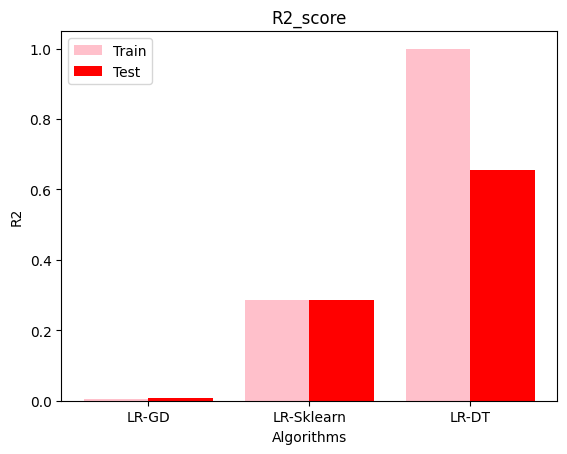

In [156]:
#12. Comparando resultados
XX = ['LR-GD', 'LR-Sklearn', 'LR-DT']
X_axis = np.arange(len(XX))
#print(X_axis)

plt.bar(X_axis-0.2, R2_train, 0.4, label = 'Train', color = 'pink')
plt.bar(X_axis+0.2, R2_test, 0.4, label = 'Test', color = 'red')

plt.xticks(X_axis, XX)
plt.xlabel('Algorithms')
plt.ylabel('R2')
plt.title('R2_score')
plt.legend()
plt.show

In [157]:
#lIBRERIAS

#Libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
%matplotlib inline

from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.utils import shuffle

In [158]:
#1. Load dataset
weather_data_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/', 'IndianWeatherRepository.csv')

df = pd.read_csv(weather_data_path)
NewData = np.array(df)
#x = NewData[:, 0:-1]
#y = NewData[:, -1]

#print('x:', np.shape(x))
#print('y:', np.shape(y))

Y = df['temperature_celsius']
X = df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

X = np.array(X)
Y = np.array(Y)

Y = Y.reshape(-1,1)
print(X.shape, Y.shape)

(79948, 8) (79948, 1)


In [159]:
m, n = X_train.shape

model = Sequential()

model.add(Dense(100, input_dim = n, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(600, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [160]:
model.fit(X_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
56/56 [==============================] - 6s 90ms/step - loss: 95.4935
Epoch 2/10
56/56 [==============================] - 7s 123ms/step - loss: 35.8937
Epoch 3/10
56/56 [==============================] - 5s 90ms/step - loss: 34.8636
Epoch 4/10
56/56 [==============================] - 6s 104ms/step - loss: 33.7190
Epoch 5/10
56/56 [==============================] - 6s 106ms/step - loss: 32.4388
Epoch 6/10
56/56 [==============================] - 5s 90ms/step - loss: 31.2503
Epoch 7/10
56/56 [==============================] - 7s 121ms/step - loss: 30.5491
Epoch 8/10
56/56 [==============================] - 5s 91ms/step - loss: 29.8756
Epoch 9/10
56/56 [==============================] - 6s 101ms/step - loss: 28.9972
Epoch 10/10
56/56 [==============================] - 7s 124ms/step - loss: 27.9887


In [161]:
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

750/750 [==============================] - 3s 4ms/step


In [162]:
#7. Implementar R2 como medición de desempeño
from sklearn.metrics import r2_score

y_hat_train = np.dot(X_train, w.T)
y_hat_test = np.dot(X_test, w.T)


r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_pred_test)

R2_train. append (r2_train)
R2_test. append(r2_test)

print(R2_train, R2_test)

[0.006215428462353567, 0.2852559196110802, 0.9994130576253389, 0.24658736412184035] [0.007256631931191748, 0.2859972313411543, 0.6551391076238975, 0.2464709108730282]


In [163]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores))

750/750 [==============================] - 3s 4ms/step - loss: 27.3254

loss: 27.33%


<function matplotlib.pyplot.show(close=None, block=None)>

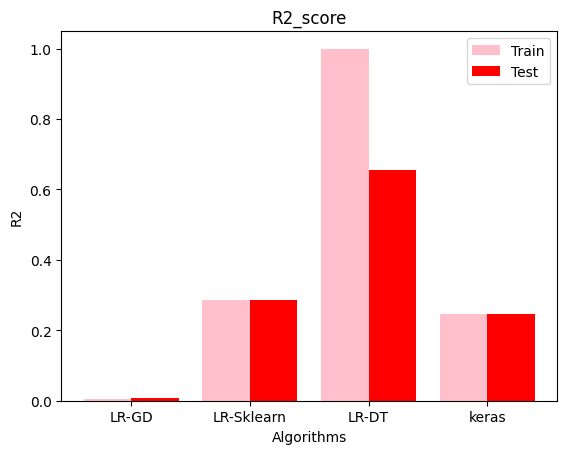

In [164]:
#12. Comparando resultados
XX = ['LR-GD', 'LR-Sklearn', 'LR-DT', 'keras']
X_axis = np.arange(len(XX))
#print(X_axis)

plt.bar(X_axis-0.2, R2_train, 0.4, label = 'Train', color = 'pink')
plt.bar(X_axis+0.2, R2_test, 0.4, label = 'Test', color = 'red')

plt.xticks(X_axis, XX)
plt.xlabel('Algorithms')
plt.ylabel('R2')
plt.title('R2_score')
plt.legend()
plt.show